In [1]:
import pandas as pd
import servicex as sx
from func_adl_servicex import ServiceXSourceUpROOT
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200 # make figures bigger and more readable

In [2]:
dataset_name = ["root://eospublic.cern.ch//eos/root-eos/benchmark/Run2012B_SingleMu.root"]
sx_dataset = sx.ServiceXDataset(dataset_name, "uproot")
ds = ServiceXSourceUpROOT(sx_dataset, "Events")
filtered_missing_ET_4 = ds.Where(lambda event: event.Jet_pt.Where(lambda pT: pT > 40).Count() >= 2)\
                          .Select(lambda event: event.MET_pt).AsAwkwardArray().value()

[root://eospublic.ce...:   0%|          | 0/9000000000.0 [00:00]

        [root://eospublic.ce... Downloaded:   0%|          | 0/9000000000.0 [00:00]

In [3]:
filtered_missing_ET_4

<Array [15, 44.7, 30.5, ... 123, 30.3, 20.4] type='6665702 * float32'>

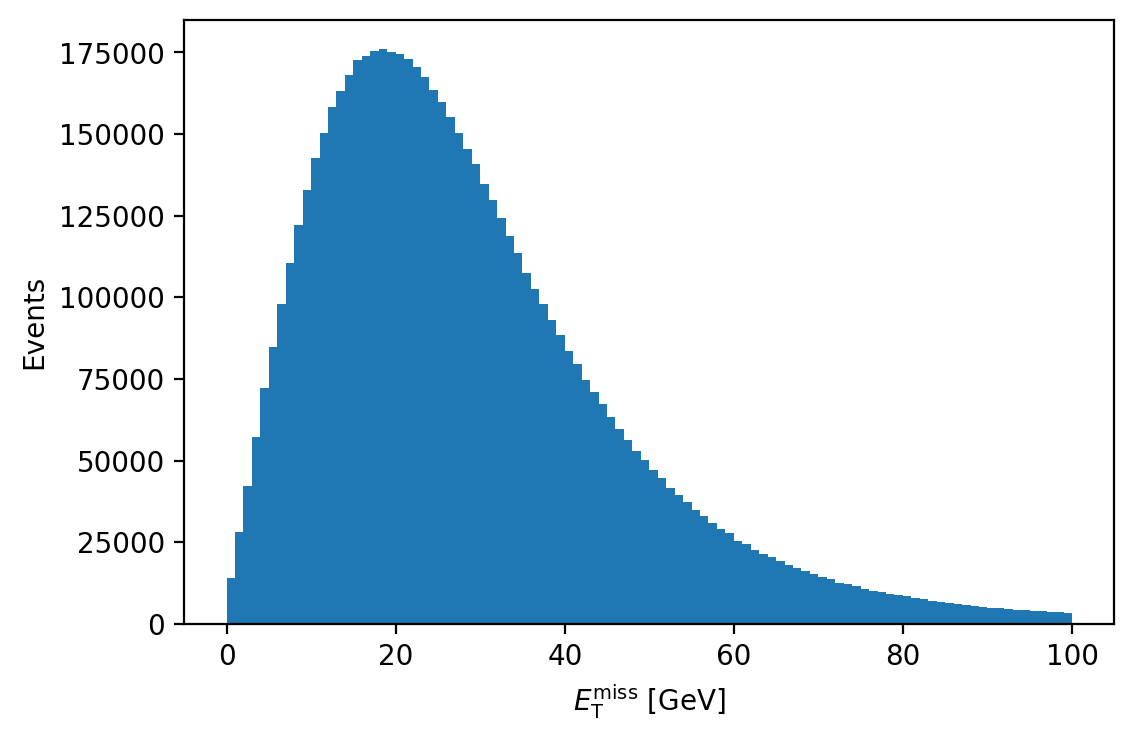

In [4]:
plt.hist([filtered_missing_ET_4], bins=100, range=(0, 100))
plt.xlabel(r'$E_\mathrm{T}^\mathrm{miss}$ [GeV]')
plt.ylabel('Events')
plt.show()